In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    print("random_index: ", random_index)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])   # target
        random_labels.append(skip_grams[i][1])   # context word
        
    return random_inputs, random_labels

In [3]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WT is not Traspose relationship
        self.W = nn.Linear(voc_size, embedding_size, bias = False)    # voc_size > embeddingsize Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias = False)   # embedding_size > voc_size Weight
        
    def forward(self, X):
        # X: [batch_size, voc_size]
        hidden_layer = self.W(X)    # hidden_layer: [batch_size, embedding_size]
        output_layer = self.WT(hidden_layer)    # output_layer: [batch_size, voc_size]
        return output_layer

skip_grams:  [[2, 0], [2, 1], [1, 2], [1, 2], [2, 1], [2, 3], [3, 2], [3, 1], [1, 3], [1, 3], [3, 1], [3, 2], [2, 3], [2, 1], [1, 2], [1, 5], [5, 1], [5, 4], [4, 5], [4, 6], [6, 4], [6, 4], [4, 6], [4, 7], [7, 4], [7, 6], [6, 7], [6, 7], [7, 6], [7, 5], [5, 7], [5, 6]]
random_index:  [ 1 20]
input_batch:  

/tmp/ipykernel_43867/2785249450.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352660876/work/torch/csrc/utils/tensor_new.cpp:201.)
  input_batch = torch.Tensor(input_batch)


tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.]])
target_batch:  tensor([1, 4])
output:  tensor([[ 0.0942,  0.1343, -0.0128,  0.0721,  0.1657,  0.0475, -0.0283,  0.2027],
        [-0.1116, -0.0776, -0.0437, -0.1029, -0.1273, -0.0588,  0.0602, -0.0934]],
       grad_fn=<MmBackward0>)


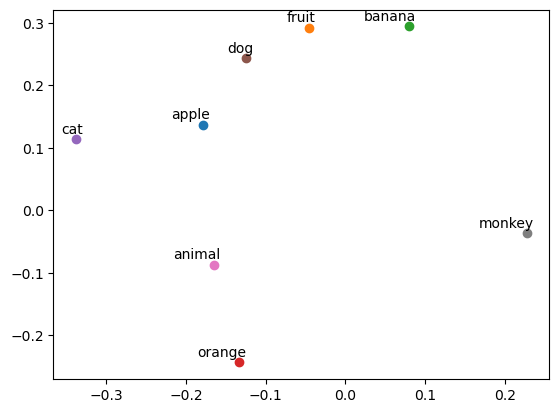

In [4]:
if __name__=='__main__':
    batch_size = 2        # mini-batch size
    embedding_size = 2    # embedding size
    
    sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
                 "dog cat animal", "cat monkey animal", "monkey dog animal"]
    
    word_sequence = " ".join(sentences).split()
    word_list = " ".join(sentences).split()
    word_list = list(set(word_list))
    word_dict = {w: i for i, w in enumerate(word_list)}
    voc_size = len(word_list)
    
    # Make skip gram of one size window
    skip_grams = []
    for i in range(1, len(word_sequence) - 1):
        # one size window: with the previous and next ones as context 
        target = word_dict[word_sequence[i]]
        context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
        for w in context:
            skip_grams.append([target, w])
        
    model = Word2Vec()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print("skip_grams: ", skip_grams)
    
    # Training
    for epoch in range(1):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch)
        target_batch = torch.LongTensor(target_batch)
        
        optimizer.zero_grad()
        output = model(input_batch)
        print("input_batch: ", input_batch)
        print("target_batch: ", target_batch)
        print("output: ", output)
        
        # output: [batch_size, voc_size], target_batch: [batch_size](LongTensor, not one-hot)
        loss = criterion(output, target_batch)
        if (epoch + 1) % 1000 == 0:
            print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
            
        loss.backward()
        optimizer.step()
    
    for i, label in enumerate(word_list):
        W, WT = model.parameters()
        x, y = W[0][i].item(), W[1][i].item()
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

In [5]:
input_batch, target_batch = random_batch()
input_batch = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

output = model(input_batch)
print("output: ", output)

random_index:  [5 7]
output:  tensor([[ 0.0935,  0.1348, -0.0135,  0.0714,  0.1652,  0.0470, -0.0282,  0.2029],
        [-0.1166, -0.1291, -0.0113, -0.0974, -0.1731, -0.0599,  0.0475, -0.1833]],
       grad_fn=<MmBackward0>)


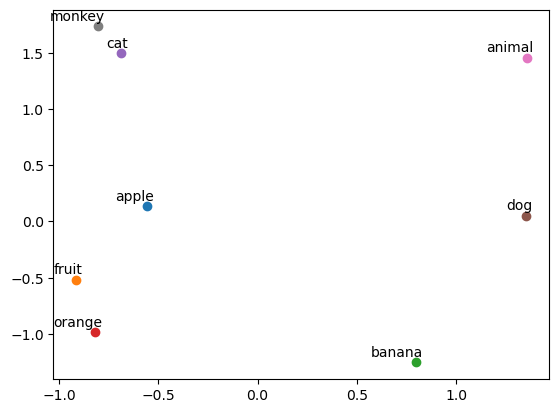

In [13]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = WT[i][0].item(), WT[i][1].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()